In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np


In [2]:
path_gtex_lung = '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_lung_filtered.csv'
path_gtex_breast= '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_breast_mammary_tissu_filtered.csv'
path_tcga_lung = '/nfs/data2/dysregnet_gtex/gtex/tcga_lung_controls.csv'
path_tcga_breast = '/nfs/data2/dysregnet_gtex/gtex/tcga_breast_controls.csv'

In [3]:
gtex_lung = pd.read_csv(path_gtex_lung, index_col=0)
gtex_breast= pd.read_csv(path_gtex_breast, index_col=0)
tcga_lung = pd.read_csv(path_tcga_lung, index_col=0)
tcga_breast = pd.read_csv(path_tcga_breast, index_col=0)

In [31]:
tcga_breast

,TCGA-BH-A204-11,TCGA-BH-A0DH-11,TCGA-E2-A1BC-11,TCGA-BH-A18J-11,TCGA-BH-A0BM-11,TCGA-E9-A1RB-11,TCGA-BH-A0DG-11,TCGA-E2-A15I-11,TCGA-A7-A13E-11,TCGA-AC-A2FF-11,...,TCGA-E2-A1L7-11,TCGA-E2-A158-11,TCGA-BH-A0E1-11,TCGA-BH-A1FG-11,TCGA-BH-A208-11,TCGA-BH-A1EU-11,TCGA-GI-A2C9-11,TCGA-A7-A13F-11,TCGA-E9-A1NG-11,TCGA-E9-A1N4-11
sample,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.599985,4.500002e-01,3.199899e-01,0.979983,0.349990,5.600106e-01,7.399767e-01,0.479997,0.290002,0.629995,...,0.570015,0.959994,0.290002,5.499907e-01,1.280026,1.090037e+00,0.589988,0.360007,0.959994,1.449952
RP11-34P13.8,0.180005,-1.089298e-08,-1.089298e-08,0.530006,1.070031,-1.089298e-08,3.800098e-01,0.219997,0.579996,0.629995,...,0.560011,0.869973,0.760017,-1.089298e-08,0.629995,-1.089298e-08,0.530006,0.219997,0.270007,0.299993
CICP27,0.370002,2.999926e-01,2.399992e-01,1.130001,0.690020,7.000066e-01,1.310029e+00,0.319990,0.339990,0.900001,...,0.909986,0.879991,0.250007,9.999639e-03,0.659990,6.799874e-01,1.059982,0.640002,0.440015,0.890002
RP11-34P13.15,3.239912,1.293034e+01,6.270019e+00,11.099864,6.069856,1.690027e+00,8.699731e-01,3.569930,4.969876,2.269956,...,8.610115,2.440047,2.290036,3.139948e+00,3.949951,7.910219e+00,7.250101,3.099928,2.160001,4.249993
RP11-34P13.16,3.009911,1.050033e+01,9.400218e-01,14.340261,0.829988,7.200144e-01,-1.089298e-08,2.499991,2.200062,1.349974,...,5.630035,2.829977,1.130001,2.829977e+00,4.729852,1.032994e+01,2.870093,2.499991,1.800002,5.529845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,20120.798342,5.274065e+03,1.203710e+04,7443.677345,7446.257575,1.334027e+04,5.879997e+03,17380.716267,14012.239162,4698.875061,...,3960.315454,14443.170997,3344.325531,5.510623e+03,6249.823660,9.728488e+03,3784.008512,8336.926073,12375.505912,7149.862580
MT-ND4,30434.076165,1.137674e+04,1.859465e+04,8733.231298,11049.549033,1.793139e+04,7.256709e+03,26630.648598,16675.008929,6963.513955,...,5101.124926,18985.362486,4466.409074,1.377056e+04,8219.300048,1.431361e+04,4873.355337,11479.720325,13900.988885,8442.179733
MT-ND5,5023.578525,2.139116e+03,3.794515e+03,3288.695138,2694.869067,5.033687e+03,3.700744e+03,6878.125813,6580.127306,2476.521478,...,1169.599404,5524.008173,706.133894,2.824734e+03,1771.553336,5.043466e+03,1853.323769,2622.813390,2024.569267,1515.101833


In [4]:
common_genes = list(set(gtex_lung.index) & set(gtex_breast.index) & set(tcga_lung.index) & set(tcga_breast.index))
print(len(common_genes))
combined_matrix = pd.concat([gtex_lung.loc[common_genes], 
                             gtex_breast.loc[common_genes],
                             tcga_lung.loc[common_genes],
                             tcga_breast.loc[common_genes]], axis=1)


16258


In [5]:
labels = ['gtex_lung'] * gtex_lung.shape[1] + ['gtex_breast'] * gtex_breast.shape[1] + \
         ['tcga_lung'] * tcga_lung.shape[1] + ['tcga_breast'] * tcga_breast.shape[1]

In [6]:
combined_matrix_log = np.log10(0.01 + combined_matrix.T)

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_matrix_log)
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]
explained_variance = pca.explained_variance_ratio_


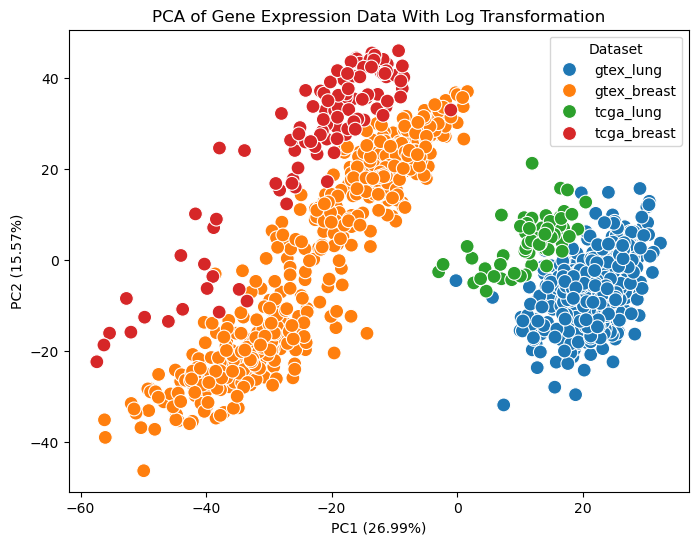

In [ ]:
pca_df = pd.DataFrame({
    'PC1': pc1,
    'PC2': pc2,
    'Dataset': labels
})


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Dataset', palette='tab10', s=100)
plt.title('PCA of Gene Expression Data With Log Transformation')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%})')
plt.legend(title='Dataset')
plt.show()

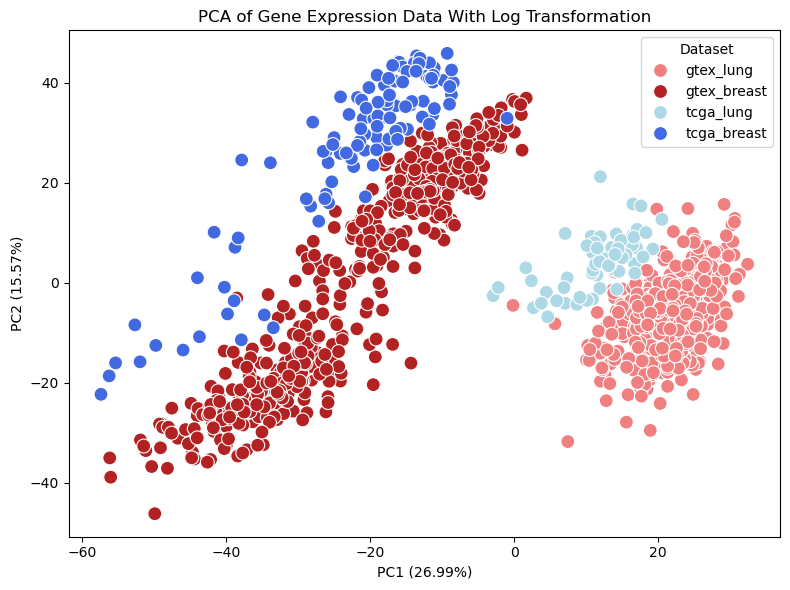

In [12]:
#different coloring
custom_palette = {
    'gtex_lung': 'lightcoral',    # Light red
    'gtex_breast': 'firebrick',  # Darker red
    'tcga_lung': 'lightblue',    # Light blue
    'tcga_breast': 'royalblue'  # Darker blue
}
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Dataset',
    palette=custom_palette,
    s=100
)

# Update plot labels and title
plt.title('PCA of Gene Expression Data With Log Transformation')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%})')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()